In [59]:
import numpy as np
import pandas as pd

In [60]:
file_path = 'HKFoods_Hackathon data .xlsx'
df_faith_prod = pd.read_excel(file_path, sheet_name="FAITH PRODUCTION", skiprows=4, usecols="A:D", header=0)
df_hope_prod = pd.read_excel(file_path, sheet_name="HOPE PRODUCTION", skiprows=4, usecols="A:D", header=0)
df_faith_post_cook = pd.read_excel(file_path, sheet_name="FAITH STORAGE AFTER COOKING", skiprows=4, usecols="A:D", header=0)
df_hope_post_cook = pd.read_excel(file_path, sheet_name="HOPE STORAGE AFTER COOKING", skiprows=4, usecols="A:D", header=0)
df_package_weight = pd.read_excel(file_path, sheet_name="HOPE-FAITH PACKAGE WEIGHTS", skiprows=5, usecols="A:AJ", header=0)

print(len(df_faith_prod))
print(len(df_hope_prod))
print(len(df_faith_post_cook))
print(len(df_hope_post_cook))
print(len(df_package_weight))


15503
5325
15450
5307
630


In [61]:
df_faith_prod = df_faith_prod.rename(columns={"PRODUCTION DATE": "BATCH INTO STORAGE"})


df_faith = pd.merge(df_faith_prod, df_faith_post_cook, on=["BATCH no.","BATCH INTO STORAGE"], how="inner").dropna()
df_faith

df_faith.columns = [
    "batch_id",
    "batch_into_storage",
    "batch_weight_before_cooking",
    "batch_weight_after_cooking",
    "batch_out_of_storage",
    "batch_final_weight"
]

df_faith["batch_id"] = df_faith["batch_id"].astype(int)
df_faith["batch_into_storage"] = pd.to_datetime(df_faith["batch_into_storage"], format="%d/%m/%y")
df_faith["batch_out_of_storage"] = pd.to_datetime(df_faith["batch_out_of_storage"], format="%d/%m/%y")

df_faith["batch_weight_before_cooking"] = df_faith["batch_weight_before_cooking"].astype(float)
df_faith["batch_weight_after_cooking"] = df_faith["batch_weight_after_cooking"].astype(float)
df_faith["batch_final_weight"] = df_faith["batch_final_weight"].astype(float)

df_faith["storage_time"] = (df_faith["batch_out_of_storage"] - df_faith["batch_into_storage"]).dt.days

df_faith.to_csv('faith.csv', index=False)
df_faith.head(3)

,batch_id,batch_into_storage,batch_weight_before_cooking,batch_weight_after_cooking,batch_out_of_storage,batch_final_weight,storage_time
0,1637,2023-10-09,293.3,286.0,2023-10-09,286.0,0
1,1638,2023-10-09,283.5,277.0,2023-10-09,277.0,0
2,1639,2023-10-09,279.0,273.0,2023-10-09,273.0,0


In [107]:
df_hope_prod = df_hope_prod.rename(columns={"PRODUCTION DATE": "BATCH INTO STORAGE"})

df_hope = pd.merge(df_hope_prod, df_hope_post_cook, on=["BATCH no.","BATCH INTO STORAGE"], how="inner").dropna()
df_hope

df_hope.columns = [
    "batch_id",
    "batch_into_storage",
    "batch_weight_before_cooking",
    "batch_weight_after_cooking",
    "batch_out_of_storage",
    "batch_final_weight"
]

df_hope["batch_id"] = df_hope["batch_id"].astype(int)
df_hope["batch_into_storage"] = pd.to_datetime(df_hope["batch_into_storage"], format="%d/%m/%y")
df_hope["batch_out_of_storage"] = pd.to_datetime(df_hope["batch_out_of_storage"], format="%d/%m/%y")

df_hope["batch_weight_before_cooking"] = df_hope["batch_weight_before_cooking"].astype(float)
df_hope["batch_weight_after_cooking"] = df_hope["batch_weight_after_cooking"].astype(float)
df_hope["batch_final_weight"] = df_hope["batch_final_weight"].astype(float)

df_hope["storage_time"] = (df_hope["batch_out_of_storage"] - df_hope["batch_into_storage"]).dt.days
df_hope["cooking_weight_difference"] = (df_hope["batch_weight_before_cooking"] - df_hope["batch_weight_after_cooking"])
df_hope["storage_weight_difference"] = (df_hope["batch_weight_after_cooking"] - df_hope["batch_final_weight"])

df_hope.to_csv('hope.csv', index=False)

df_hope.head(3)



,batch_id,batch_into_storage,batch_weight_before_cooking,batch_weight_after_cooking,batch_out_of_storage,batch_final_weight,storage_time,cooking_weight_difference,storage_weight_difference
0,1752,2023-10-09,200.1,188.0,2023-10-10,188.0,1,12.1,0.0
1,1753,2023-10-09,205.5,194.2,2023-10-10,194.2,1,11.3,0.0
2,1754,2023-10-09,203.9,192.2,2023-10-10,192.2,1,11.7,0.0


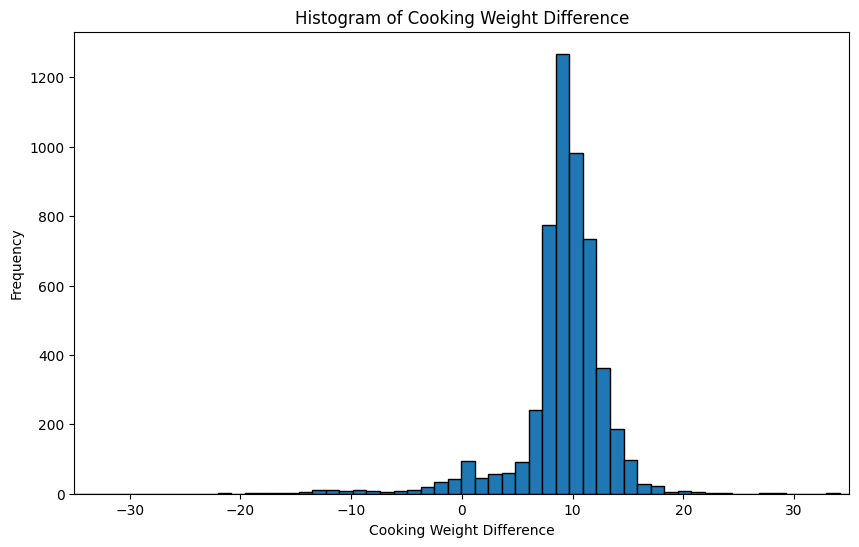

In [106]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(df_hope["cooking_weight_difference"], bins=300, edgecolor='black')
plt.title("Histogram of Cooking Weight Difference")
plt.xlabel("Cooking Weight Difference")
plt.ylabel("Frequency")
plt.xlim(-35, 35)  # Change x-axis tick range

plt.show()


In [63]:
df_package_weight.columns = ["ProductId", "PackingDate", "ExpireDate", "AverageWeight"] + ["BatchWeight" + str(i) for i in range(1, 33)]
df_package_weight.to_csv('package_weight.csv', index=False)

df_package_weight.head(3)

,ProductId,PackingDate,ExpireDate,AverageWeight,BatchWeight1,BatchWeight2,BatchWeight3,BatchWeight4,BatchWeight5,BatchWeight6,...,BatchWeight23,BatchWeight24,BatchWeight25,BatchWeight26,BatchWeight27,BatchWeight28,BatchWeight29,BatchWeight30,BatchWeight31,BatchWeight32
0,5030,2023-10-02,2023-10-29,584.68750,584,601,597,590,587,585,...,587,585,582,584,581,586,580,580,583.0,585.0
1,5030,2023-10-03,2023-11-01,585.96875,579,585,584,593,592,585,...,588,584,585,581,585,585,583,587,590.0,592.0
2,5409,2023-10-03,2023-11-02,408.81250,411,408,408,408,408,406,...,404,409,409,410,408,406,408,407,409.0,412.0
